In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import matplotlib.image as mping
from google.colab import files
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, AvgPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

!pip install split-folders
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir="/content/drive/My Drive/face-mask-detector/dataset4/"
data_dir="/content/drive/My Drive/face-mask-detector/dataset/"

In [ ]:
splitfolders.ratio(data_dir, output=base_dir, seed=50, ratio=(.7, .1, .2))

Copying files: 1376 files [06:56,  3.30 files/s]


In [ ]:
train_path = "/content/drive/My Drive/face-mask-detector/dataset4/train/"
test_path  = "/content/drive/My Drive/face-mask-detector/dataset4/test/"
val_path   = "/content/drive/My Drive/face-mask-detector/dataset4/val/"

In [ ]:
train_withMask = os.path.join(train_path, 'with_mask')
train_withoutMask = os.path.join(train_path, 'without_mask')

val_withMask = os.path.join(val_path, 'with_mask')
val_withoutMask = os.path.join(val_path, 'without_mask')

test_withMask = os.path.join(test_path, 'with_mask')
test_withoutMask = os.path.join(test_path, 'without_mask')

In [ ]:
print('total training with_mask images   :', len(os.listdir(train_withMask)))
print('total training without_mask images:', len(os.listdir(train_withoutMask)))
print('total val with_mask images        :', len(os.listdir(val_withMask)))
print('total val without_mask images     :', len(os.listdir(val_withoutMask)))
print('total test with_mask images       :', len(os.listdir(test_withMask)))
print('total test without_mask images    :', len(os.listdir(test_withoutMask)))

total training with_mask images   : 482
total training without_mask images: 480
total val with_mask images        : 69
total val without_mask images     : 68
total test with_mask images       : 139
total test without_mask images    : 138


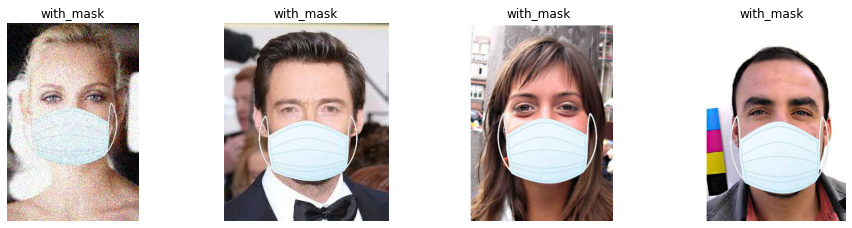

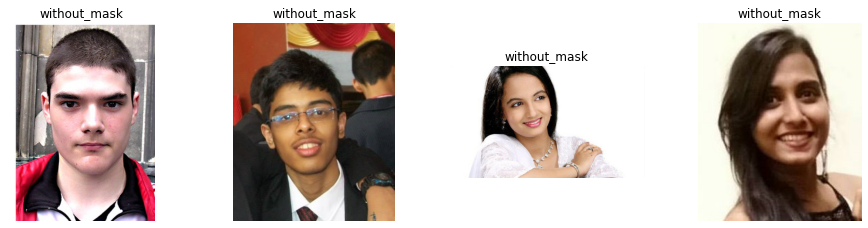

In [ ]:
with_mask = os.listdir(train_withMask)
without_mask = os.listdir(train_withoutMask)

fname1 = [os.path.join(train_withMask,fname)
        for fname in with_mask[0:4]]

fname2 = [os.path.join(train_withoutMask,fname)
        for fname in without_mask[0:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('with_mask')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('without_mask')
    plt.imshow(img)
    
plt.show()

In [ ]:
import cv2
import numpy as np

train_data = []
train_label = []
for r, d, f in os.walk(train_path):
    for file in f:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (224,224))
      train_data.append(image)
      label = imagePath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

test_data = []
test_label = []
for r, d, f in os.walk(test_path):
    for file in f:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (224,224))
      test_data.append(image)
      label = imagePath.split(os.path.sep)[-2]
      test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

val_data = []
val_label = []
for r, d, f in os.walk(val_path):
    for file in f:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (224,224))
      val_data.append(image)
      label = imagePath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (962, 224, 224, 3)
Train Label =  (962,)
Test Data =  (277, 224, 224, 3)
Test Label =  (277,)
Validation Data =  (137, 224, 224, 3)
Validation Label =  (137,)


In [ ]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)
y_val = lb.fit_transform(val_label)

print("Label sebelum di-encoder ", train_label[500:503])
print("Label setelah di-encoder ", y_train[500:503])
print("Label sebelum di-encoder ", train_label[0:3])
print("Label setelah di-encoder ", y_train[0:3])

Label sebelum di-encoder  ['with_mask' 'with_mask' 'with_mask']
Label setelah di-encoder  [0 0 0]
Label sebelum di-encoder  ['without_mask' 'without_mask' 'without_mask']
Label setelah di-encoder  [1 1 1]


In [ ]:
baseModel = InceptionV3(weights="imagenet",
                        include_top=False,
                        input_tensor=Input(shape=(224, 224, 3)))

headModel1 = baseModel.output
headModel1 = AvgPool2D((3,3), padding='same')(headModel1)
headModel1 = Flatten(name="flatten")(headModel1)
headModel1 = Dense(128, activation="relu")(headModel1)
headModel1 = Dropout(0.5)(headModel1)
headModel1 = Dense(1, activation="sigmoid")(headModel1)

model1 = Model(inputs=baseModel.input, outputs=headModel1)

for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model1.summary()

In [ ]:
INIT_LR = 0.0001
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR)
model1.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
H1 = model1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
31/31 [==============================] - 116s 4s/step - loss: 0.1829 - accuracy: 0.9200 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 2/10
31/31 [==============================] - 109s 4s/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 3/10
31/31 [==============================] - 109s 4s/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 110s 4s/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 109s 4s/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 110s 4s/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 110s 4s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 8/10
31

In [ ]:
pred_train = model1.predict(x_train)
labels_train = (pred_train > 0.5).astype(np.int)
print(classification_report(y_train, labels_train))
print(accuracy_score(y_train,labels_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       1.00      1.00      1.00       480

    accuracy                           1.00       962
   macro avg       1.00      1.00      1.00       962
weighted avg       1.00      1.00      1.00       962

1.0


In [ ]:
pred_test = model1.predict(x_test)
labels_test = (pred_test > 0.5).astype(np.int)
print(classification_report(y_test, labels_test))
print(accuracy_score(y_test,labels_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       138

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277

1.0


In [ ]:
print(confusion_matrix(y_train,labels_train))
print(confusion_matrix(y_test,labels_test))


[[482   0]
 [  0 480]]
[[139   0]
 [  0 138]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

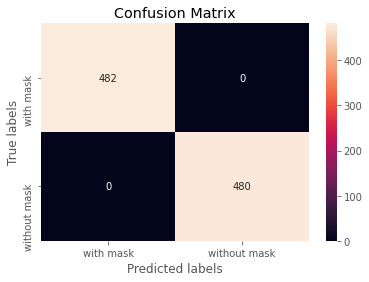

In [ ]:
cm = confusion_matrix(y_train, labels_train)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['with mask', 'without mask']); ax.yaxis.set_ticklabels(['with mask', 'without mask']);
files.download('train.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

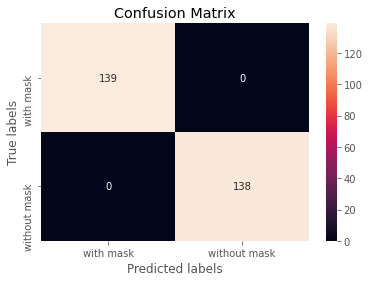

In [ ]:
cm = confusion_matrix(y_test, labels_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['with mask', 'without mask']); ax.yaxis.set_ticklabels(['with mask', 'without mask']);
files.download('test.svg')

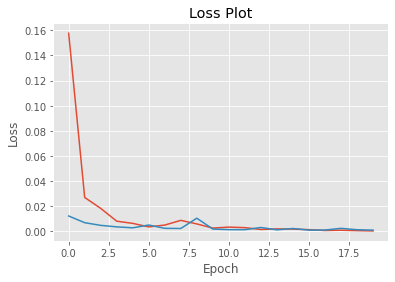

In [ ]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 20), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('/content/drive/My Drive/face-mask-detector/loss_plot.svg', format='svg')
plt.show()

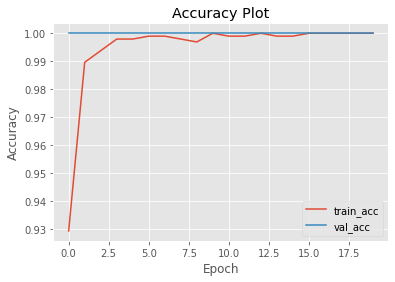

In [ ]:
plt.plot(np.arange(0, 20), H1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H1.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/My Drive/face-mask-detector/acc_plot.svg', format='svg')
plt.show()